# K-NN  Classifier

## Table of contents

- [Introduction](#introduction)
- [Work process](#work-process)
- [Example](#example)
    * [Define K](#define-k)
    * [Calculate euclidean distance](#calculate-euclidean-distance)
    * [Define neighbours and category](#define-neighbours-and-category)
- [Find best K-value](#finding-best-k-value)
- [Pros and Cons](#pros-and-cons)
- [Implementation of K-NN algorithm](#implementation-of-k-nn-algorithm)
    * [Imports](#imports)
    * [Load data](#load-data)
    * [Split data into training and test sets](#split-data-into-training-and-test-sets)
    * [Implement euclidean distance calculator](#implement-eculidean-distance-calculator)
    * [Implement classification method](#implement-classification-method)
    * [Implement K-NN algorithm](#implement-k-nn-algorithm)
    * [Prediction attempt](#prediction-attempt)
    * [Quality test](#quality-test)
        * [Comapre scores depending on K-value](#compare-scores-depending-on-k-value)
        * [Visualise scores](#visualise-scores)

## Introduction

**KNN classifier** is simple *Machine Learning* algorithm.
It belongs to supervised learning techniques.

This Classifier is called *lazy learner algorithm*. It is not because of no reasons. 
There are some examples:
* it looks for similarities between "new data" and cases in training set, then put the new object into best fitting category, basing on 
which category is it most similar to,
* it doesn't learn from training set immediately, but it looks for data at the moment of classification. It means that every new object that has to be classified must be *"compared"* with every class and after that it will be fitted to most similar one,
* **non-parametric algorithm** - means no assumption on base dataset.

## Work process

**KNN classifier** is performed in several steps and can be explained this way:
1. Decide how many **"neighbors"** will be taken into consideration (it will be our **K**),
2. Do some math, calculate the **euclidean distance** of K number of neighbors.
3. Take the K nearest neighbors, where euclidean distance is *"closest"*.
4. Every parameter has to have its "value", it is called **data points**, it has to be counted.
5. **Assign new data points** to category which number of neighbors is highest.

## Example 

### Define K

Lets take 2 categories. We have to classifie one new object as presented below.

![Alt text](classes.png)

First step is to define how many neigbors we will take to consider. In this case K = 7.

### Calculate euclidean distance

Euclidean distance between two points is a square root of sum of squares of differences (however it sounds).
In order to visualise process lets take two example points A and B. Both of them have X1 and X2 parameters.
It can be presented like this:

![Alt text](euclidean.png)

Blue line shows **distance** between those points. So in order to calculate **euclidean distance** we can use following math expression: 

$\sqrt{(X2b-X2a)^2+(X1b-X1a)^2}$

### Define neighbours and category

Now we can proceed to classification. Calculated distances helps to define which class has more neighbors to new object.
With this knowledge we select K (in our case its 7) neighbors and classifie our new object.

![Alt text](distance.png)

In this example new object is classified as object of Category 1 because it has 4 neighbors from this category and 3 from other.

## Finding best K-value

* There is no such thing as *"best value of K"*. Every data set will require different number, so we have to try some. 
* Large data set can use higher K to make it more effective, but it makes classifier works slower. 
* Too low value of K may underfit classification and return unreliable classifications.
* Try to select value of K that will not cause that every class will have same number of neighbors.

## Pros and Cons

| Advantages | Disadvantages |
| ---------- | ------------- |
| Simple implementation | Need to determine K-value every time |
| Effective on large data sets | K-value must be selected by trying some values |
| Resistance to noisy training data | High cost of computation caused by calculating distances |

## Implementation of K-NN algorithm

### Imports

In [29]:
import pandas as pd
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split as tts
import math

### Load data

In [41]:
iris = ds.load_iris()
df_x = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df_y = iris.target

In [31]:
df_x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
df_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Split data into training and test sets

In [33]:
x_train, x_test, y_train, y_test  = tts(df_x, df_y, test_size= 0.2, random_state= 0)

### Implement eculidean distance calculator

In [34]:
def euclidean_distance(new_obj, train_obj):
    distance = math.sqrt(sum([(new_obj[i] - train_obj[i])**2 for i in range(len(new_obj)-1)]))
    return distance

### Implement classification method

In [35]:
def classify(distance, K):
    selected_class = distance.iloc[0:K].pivot_table(columns= "class", aggfunc= "size")
    return selected_class.idxmax()

### Implement K-NN algorithm

In [36]:
def knn_algorithm(x_train, x_test, y_train, K):
    y_predictions = []
    for i in range(len(x_test)):
        euclidean_distances = [euclidean_distance(x_test.iloc[i], x_train.iloc[j]) for j in range(len(x_train))]
        distance = pd.DataFrame({"distance": euclidean_distances,
                                 "class": y_train})
        distance.sort_values(by= "distance", ascending= True, inplace= True)
        y_predictions.append(classify(distance, K))
    x_test['class'] = y_predictions
    return x_test

### Prediction attempt

In [37]:
prediction = knn_algorithm(x_train= x_train, x_test= x_test, y_train= y_train, K= 5)
    

In [38]:
prediction

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0
100,6.3,3.3,6.0,2.5,2
40,5.0,3.5,1.3,0.3,0
86,6.7,3.1,4.7,1.5,1
76,6.8,2.8,4.8,1.4,1
71,6.1,2.8,4.0,1.3,1


### Quality Test

#### Compare scores depending on K-value

Once algorithm is implemented, its quality has to be checked. It is necessery to adjust the value of K. For this purpose, simulation will be carried out to check for which values the algorithm obtains the highest efficiency.

In [39]:
from sklearn.metrics import accuracy_score

scores = []
for i in range(1,120):
    prediction = knn_algorithm(x_train= x_train, x_test= x_test, y_train= y_train, K= i)
    scores.append(accuracy_score(y_test, prediction["class"]))

#### Visualise scores

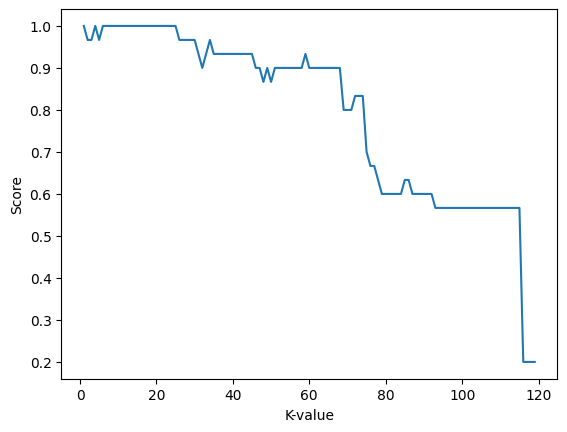

In [40]:
import matplotlib.pyplot as plt

plt.ylabel("Score")
plt.xlabel("K-value")
plt.plot(range(1,120), scores)